In [3]:
import zipfile
import pandas as pd
import re
import warnings  # Import the warnings module
import matplotlib.pyplot as plt
import seaborn as sns
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Specify the path to the ZIP folder
zip_file_path = r'C:\Users\daddy\Downloads\MedicinalProfessionals.zip'

# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Open the ZIP folder and extract CSV files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List the files in the ZIP folder
    zip_file_list = zip_ref.namelist()

    # Iterate over each CSV file in the ZIP folder
    for file_name in zip_file_list:
        if file_name.endswith('.csv'):
            # Extract the CSV file
            with zip_ref.open(file_name) as csv_file:
                # Load the CSV data into a DataFrame
                df = pd.read_csv(csv_file)

                # Use regular expressions to extract phone numbers at the end of each address
                df['Phone Numbers'] = df['ADDRESS'].str.extract(r'\((\d{3}\)\s*\d{3}-\d{4})$')

                # Remove the extracted phone numbers from the ADDRESS column
                df['ADDRESS'] = df['ADDRESS'].str.replace(r'\s*\(\d{3}\)\s*\d{3}-\d{4}$', '', regex=True)

                # Concatenate the DataFrame with the combined_df
                combined_df = pd.concat([combined_df, df], ignore_index=True)
combined_df = combined_df.drop(['NPI Url','MEDICARE', 'PECOS'], axis=1)
combined_df = combined_df.drop_duplicates()
combined_df

,NPI,NAME,TYPE,SPECIALTY,ADDRESS,Phone Numbers
0,1285601583,A PHILIP MELMED,Individual,Anesthesiology,"1850 N CENTRAL AVE SUITE 1600\nPHOENIX, AZ 85004",602) 744-4765
1,1710243233,AARON BENJAMIN DAHL,Individual,Anesthesiology\n(Critical Care Medicine),"645 E MISSOURI AVE STE 300\nPHOENIX, AZ 85012",602) 262-8900
2,1174972764,AARON PETRILLO,Individual,Anesthesiology,"645 E MISSOURI AVE STE 300\nPHOENIX, AZ 85012",602) 262-8917
3,1699391854,ACE ANESTHESIA LLC,Organization,Anesthesiology\n(Pain Medicine),"3329 E BELL RD STE A2-A5\nPHOENIX, AZ 85032",602) 482-2282
4,1720272693,ADAM JOHNSON,Individual,Anesthesiology,"645 E MISSOURI AVE STE 300\nPHOENIX, AZ 85012",602) 262-8900
...,...,...,...,...,...,...
31007,1417903550,WILLIAM BURKE,Individual,Podiatrist\n(Foot & Ankle Surgery),"755 E MCDOWELL RD\nPHOENIX, AZ 85006",602) 271-5111
31008,1104937853,WILLIAM FRIEDMAN,Individual,Podiatrist,"444 W OSBORN RD SUITE 301\nPHOENIX, AZ 85013",602) 264-1031
31009,1750305090,WILLIAM J LEONETTI,Individual,Podiatrist,"3201 W PEORIA AVE SUITE A200\nPHOENIX, AZ 85029",602) 843-3277
31010,1467096065,WOUND CARE PHYSICIANS OF ARIZONA PLLC,Organization,Podiatrist\n(Foot Surgery),"1012 E WILLETTA ST\nPHOENIX, AZ 85006",602) 839-6040


In [ ]:
# Save the filtered and de-duplicated data to a new CSV file
combined_df.to_csv('ArizonaMedicalProfessionalLeadsBatch2.csv', index=False)

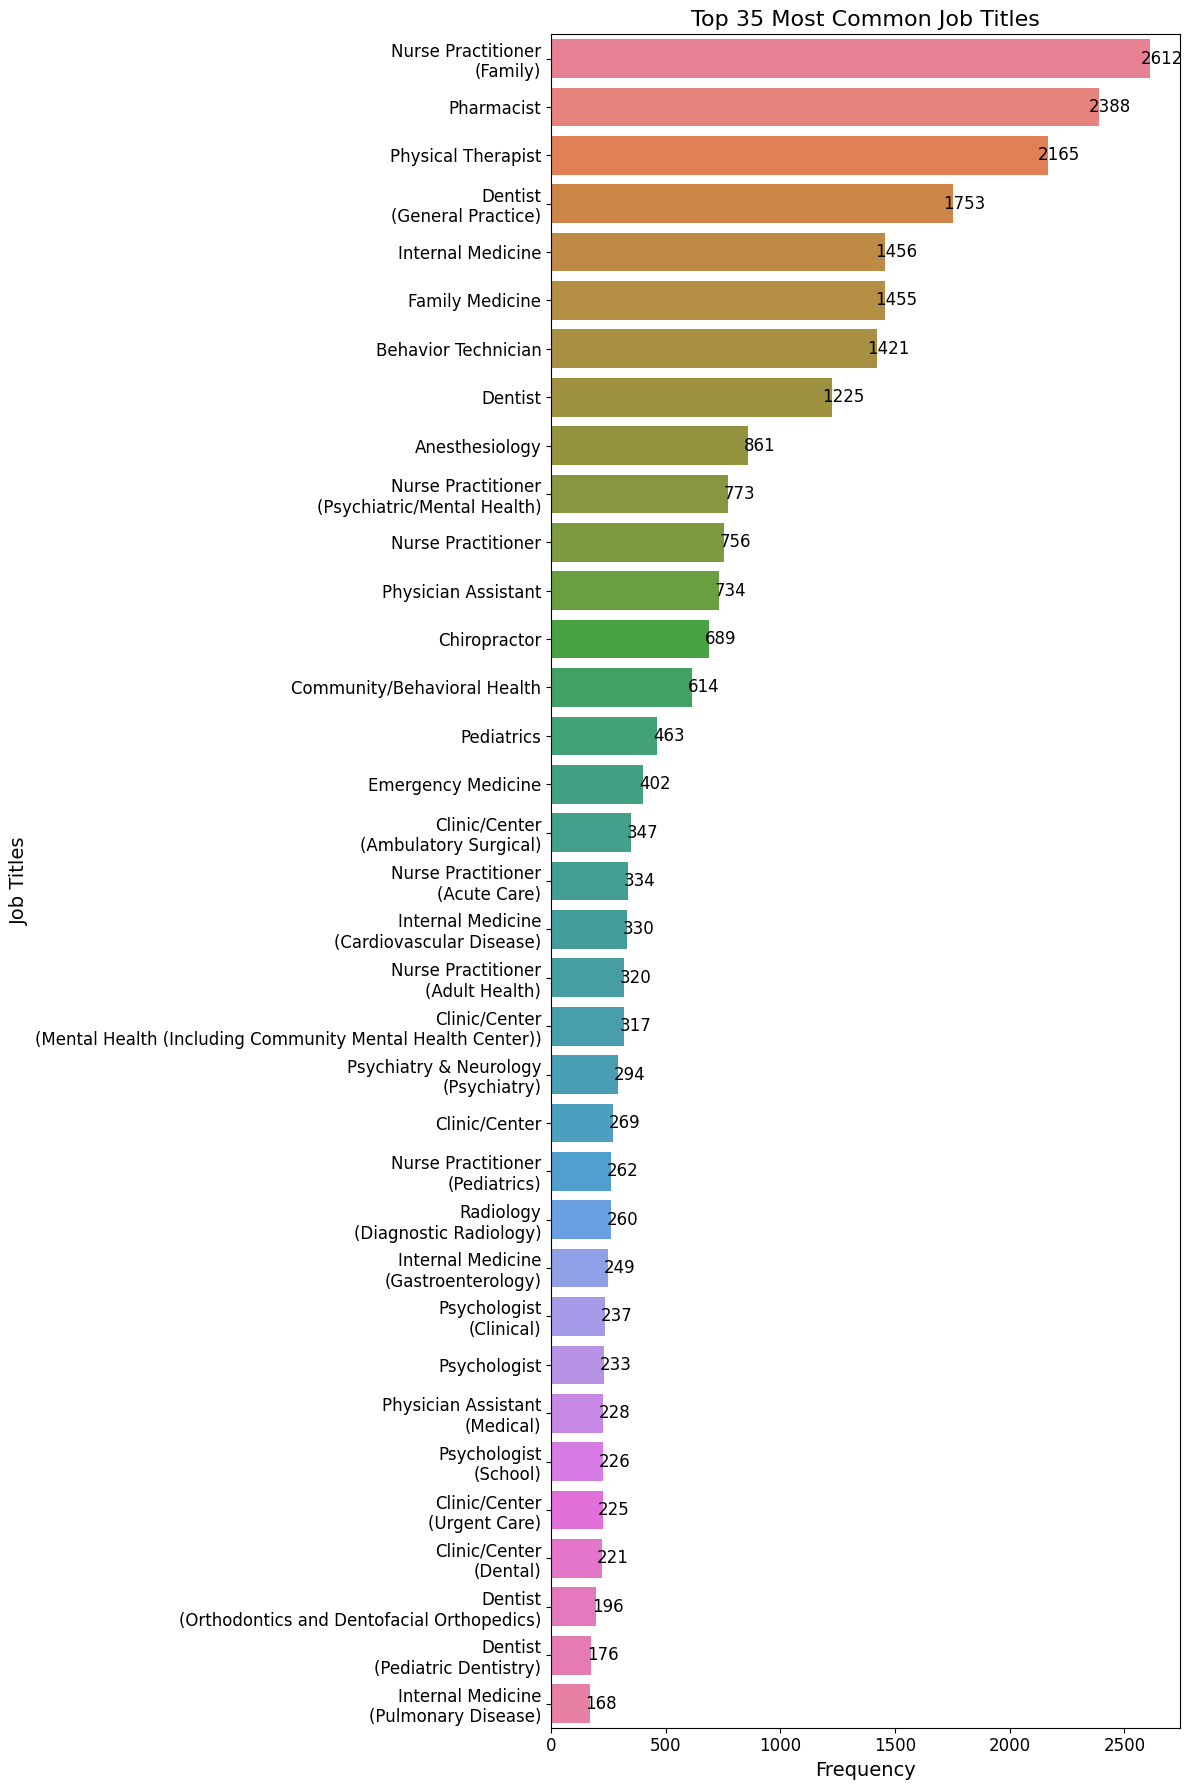

In [5]:
# Count the occurrences of each job title and select the top 35
top_job_titles = combined_df['SPECIALTY'].value_counts().head(35)
# Set a color palette for the plot (you can choose other palettes if desired)
colors = sns.color_palette("husl", len(top_job_titles))
# Create figure 
plt.figure(figsize=(12, 18))
ax = sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette=colors)

# Customize the spatial volume of the plot 
plt.title('Top 35 Most Common Job Titles', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Job Titles', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add data label counters to the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 50, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='center', va='center', fontsize=12)
# Show the plot
plt.tight_layout()
plt.show()